In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score


In [58]:
data_in_India = pd.read_csv("Unemployment in India.csv")

In [59]:
data_in_India.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [60]:
data_in_India[" Date"].value_counts()

 Date
 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name: count, dtype: int64

In [61]:
data_upto_nov_2020 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [62]:
data_upto_nov_2020.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [63]:
data_upto_nov_2020.shape

(267, 9)

In [64]:
data_upto_nov_2020.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [65]:
data_upto_nov_2020.duplicated().sum()

0

In [66]:
data_upto_nov_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [67]:
data_upto_nov_2020.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


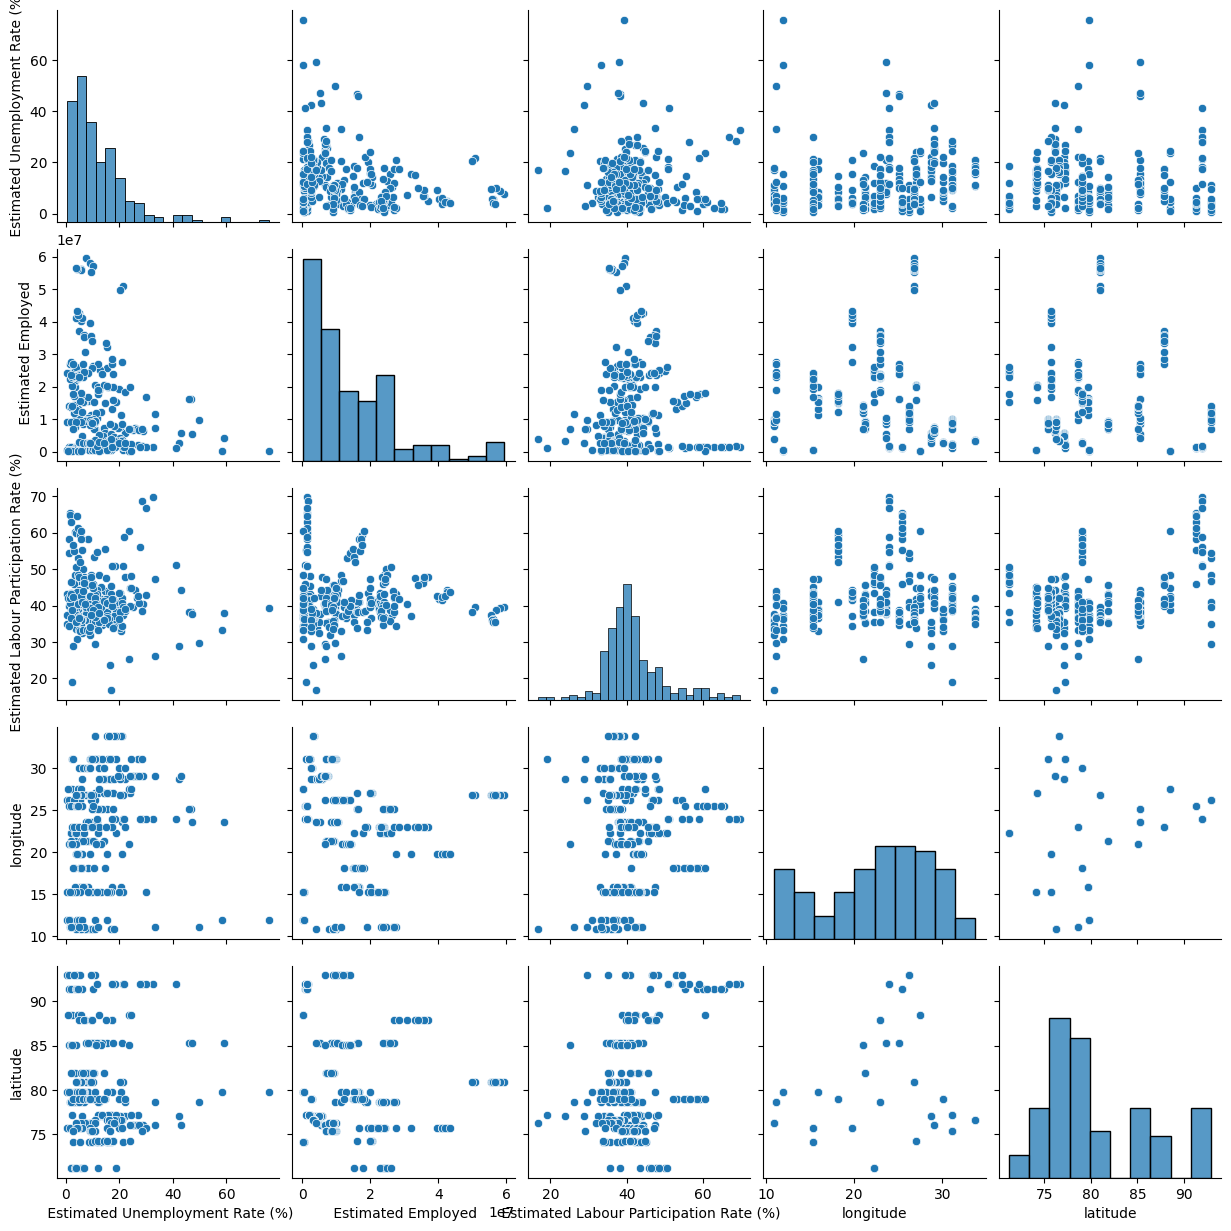

In [68]:
sns.pairplot(data_upto_nov_2020)
plt.show()

In [69]:
data_upto_nov_2020.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [70]:
data_upto_nov_2020[" Frequency"].value_counts()

 Frequency
 M    267
Name: count, dtype: int64

In [71]:
data_upto_nov_2020["Region.1"].value_counts()

Region.1
North        79
South        60
West         50
East         40
Northeast    38
Name: count, dtype: int64

In [72]:
data_upto_nov_2020["Region"].value_counts()

Region
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

In [73]:
columns_remove = ['Region',' Frequency','Region.1']

In [74]:
data_upto_nov_2020 = data_upto_nov_2020.drop(columns=columns_remove,axis=1)

In [75]:
data_upto_nov_2020.head()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
0,31-01-2020,5.48,16635535,41.02,15.9129,79.74
1,29-02-2020,5.83,16545652,40.90,15.9129,79.74
2,31-03-2020,5.79,15881197,39.18,15.9129,79.74
3,30-04-2020,20.51,11336911,33.10,15.9129,79.74
4,31-05-2020,17.43,12988845,36.46,15.9129,79.74


In [76]:
data_upto_nov_2020[" Date"].value_counts()

 Date
 31-03-2020    27
 31-05-2020    27
 30-06-2020    27
 31-07-2020    27
 31-08-2020    27
 30-09-2020    27
 31-10-2020    27
 31-01-2020    26
 29-02-2020    26
 30-04-2020    26
Name: count, dtype: int64

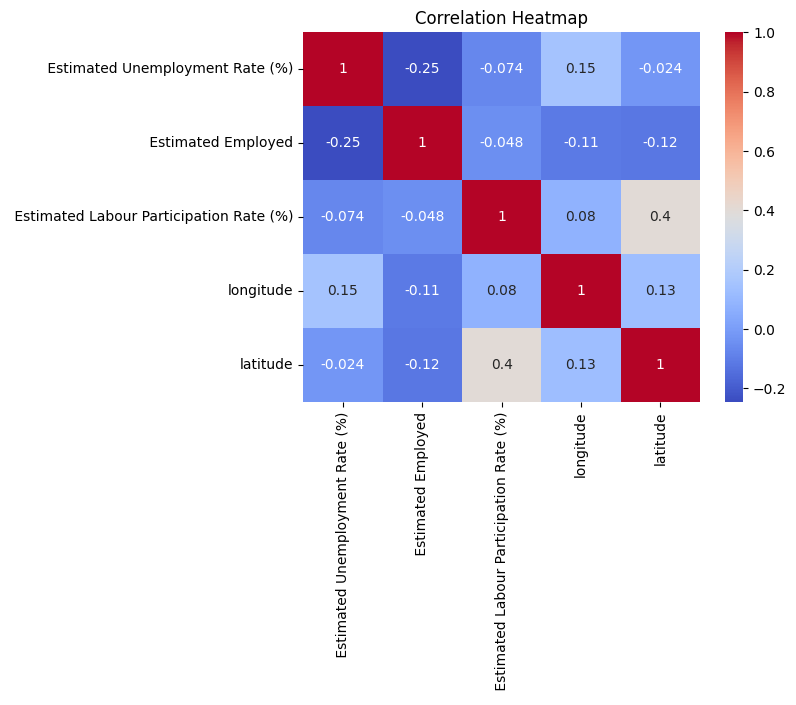

In [77]:
correlation_matrix = data_upto_nov_2020.drop(" Date",axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [78]:
data_upto_nov_2020[" Date"] = pd.to_datetime(data_upto_nov_2020[" Date"])

C:\Users\Harshavardhan Sathe\AppData\Local\Temp\ipykernel_27048\691657602.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_upto_nov_2020[" Date"] = pd.to_datetime(data_upto_nov_2020[" Date"])


In [79]:
data_upto_nov_2020.head()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
0,2020-01-31,5.48,16635535,41.02,15.9129,79.74
1,2020-02-29,5.83,16545652,40.90,15.9129,79.74
2,2020-03-31,5.79,15881197,39.18,15.9129,79.74
3,2020-04-30,20.51,11336911,33.10,15.9129,79.74
4,2020-05-31,17.43,12988845,36.46,15.9129,79.74


In [80]:
data_upto_nov_2020.sort_values(by=" Date",inplace=True)

In [81]:
data_upto_nov_2020.head()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
0,2020-01-31,5.48,16635535,41.02,15.9129,79.7400
227,2020-01-31,32.67,1508130,69.69,23.9408,91.9882
40,2020-01-31,22.23,5805284,47.79,28.7041,77.1025
217,2020-01-31,5.49,17609295,59.25,18.1124,79.0193
207,2020-01-31,1.57,26881641,41.96,11.1271,78.6569


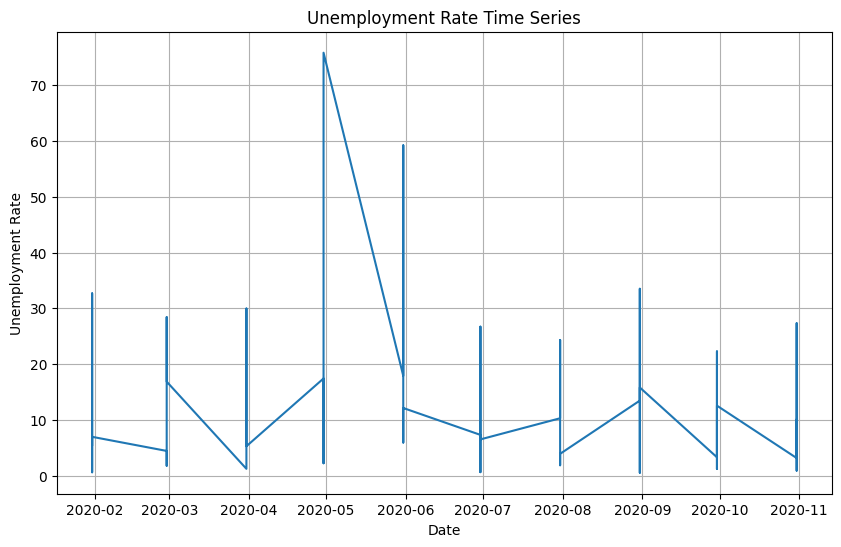

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(data_upto_nov_2020[" Date"], data_upto_nov_2020[' Estimated Unemployment Rate (%)'])
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Time Series')
plt.grid(True)
plt.show()

In [83]:
today = pd.to_datetime('today').normalize()
data_upto_nov_2020['Days Since Date'] = (today -data_upto_nov_2020[" Date"]).dt.days
data_upto_nov_2020.drop(" Date", axis=1, inplace=True)

In [84]:
data_upto_nov_2020.head()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude,Days Since Date
0,5.48,16635535,41.02,15.9129,79.7400,1503
227,32.67,1508130,69.69,23.9408,91.9882,1503
40,22.23,5805284,47.79,28.7041,77.1025,1503
217,5.49,17609295,59.25,18.1124,79.0193,1503
207,1.57,26881641,41.96,11.1271,78.6569,1503


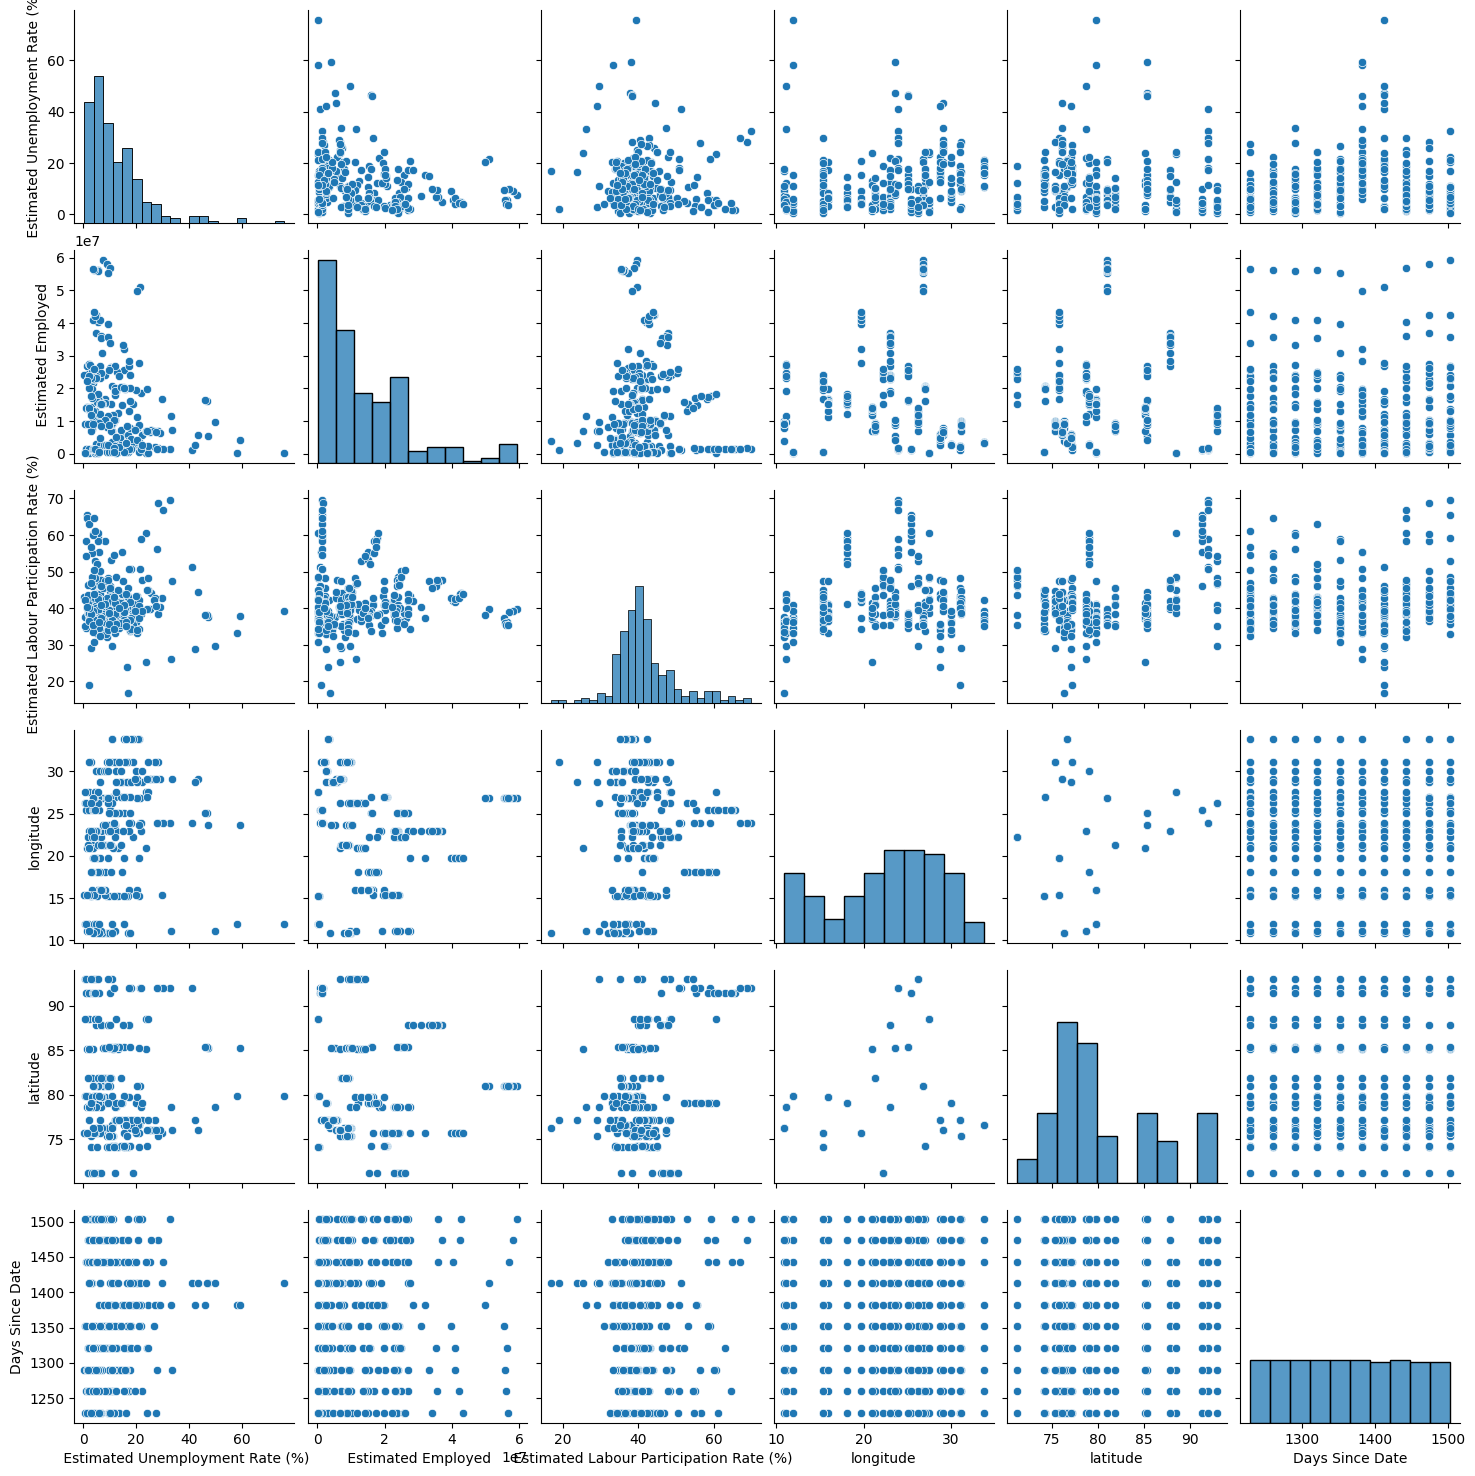

In [86]:
sns.pairplot(data_upto_nov_2020)
plt.show()

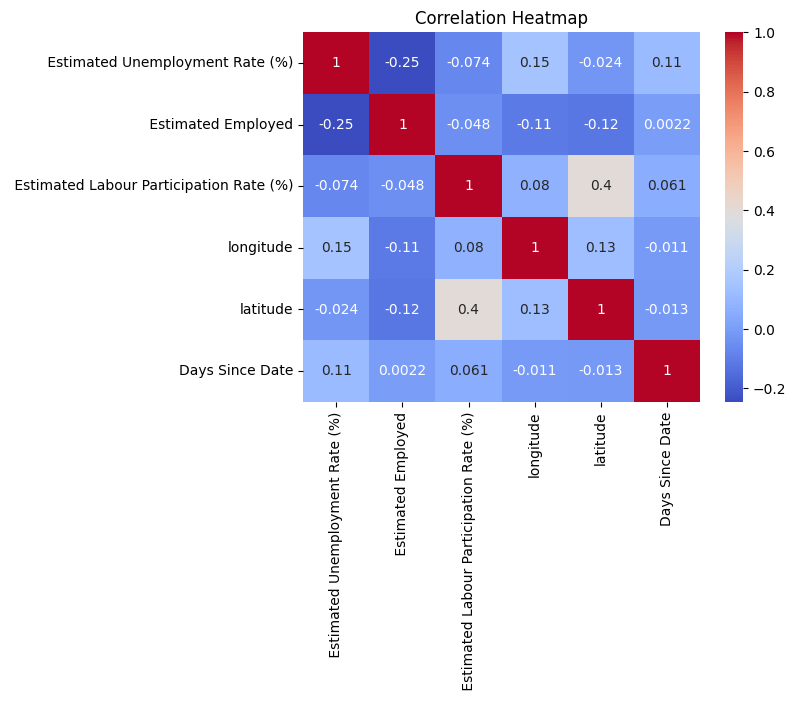

In [87]:
correlation_matrix = data_upto_nov_2020.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [89]:
scalar = MinMaxScaler()

In [90]:
normalized_data = pd.DataFrame(scalar.fit_transform(data_upto_nov_2020),columns=data_upto_nov_2020.columns)

In [91]:
normalized_data.head()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude,Days Since Date
0,0.066092,0.278473,0.458239,0.220798,0.393080,1.0
1,0.426941,0.023444,1.000000,0.570938,0.956340,1.0
2,0.288388,0.095888,0.586168,0.778691,0.271789,1.0
3,0.066224,0.294890,0.802721,0.316730,0.359937,1.0
4,0.014200,0.451210,0.476002,0.012064,0.343271,1.0


In [92]:
normalized_data.tail()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude,Days Since Date
262,0.033444,0.199470,0.568216,0.669500,1.000000,0.0
263,0.075382,0.005241,0.369426,0.047589,0.396221,0.0
264,0.355806,0.110948,0.450302,0.794162,0.225024,0.0
265,0.146516,0.004632,0.331255,0.194036,0.134816,0.0
266,0.125813,0.570586,0.545351,0.529329,0.766266,0.0


In [93]:
data_upto_nov_2020 = normalized_data

In [95]:
X = data_upto_nov_2020.drop(' Estimated Unemployment Rate (%)',axis=1)
Y = data_upto_nov_2020[" Estimated Labour Participation Rate (%)"]

In [96]:
X.shape

(267, 5)

In [97]:
Y.shape

(267,)

In [98]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=7,test_size=0.2)

In [99]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(267, 5)
(213, 5)
(54, 5)


In [100]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(267,)
(213,)
(54,)


In [102]:
model = SVR()

In [103]:
model.fit(X_train,Y_train)

SVR()

In [104]:
train_prediction = model.predict(X_train)

In [115]:
mse_train = mean_squared_error(Y_train,train_prediction)
r2_train = r2_score(Y_train,train_prediction)

In [116]:
print(f"The mean squared error on training data is {mse_train}")
print(f"The R squared score on training data is {r2_train}")

The mean squared error on training data is 0.002488220281571325
The R squared score on training data is 0.8709410314310124


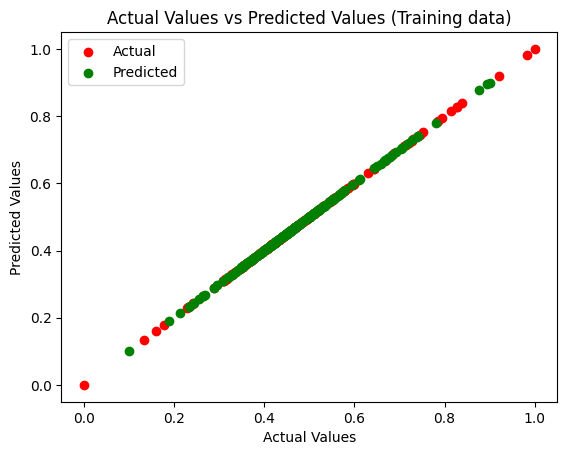

In [108]:
plt.scatter(Y_train, Y_train, color='red', label='Actual')
plt.scatter(train_prediction, train_prediction, color='green', label='Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values (Training data)")
plt.legend()
plt.show()

In [109]:
test_prediction = model.predict(X_test)

In [117]:
mse_test = mean_squared_error(Y_test,test_prediction)
r2_test = r2_score(Y_test,test_prediction)

In [118]:
print(f"The mean squared error on test data is {mse_test}")
print(f"The R squared score on test data is {r2_test}")

The mean squared error on test data is 0.004392426973909765
The R squared score on test data is 0.8624915710281617


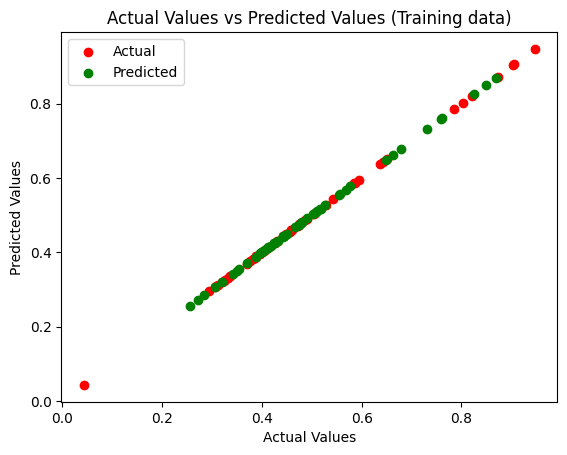

In [113]:
plt.scatter(Y_test, Y_test, color='red', label='Actual')
plt.scatter(test_prediction, test_prediction, color='green', label='Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values (Training data)")
plt.legend()
plt.show()